# Assignment A2 [40 marks]

Please **read the instructions in `README.md`** before starting!

---

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import task2, task3

---
## Task 1: Finite difference approximations [6 marks]

Consider the following finite difference approximation of the derivative $f' \left( x \right)$ of an appropriately smooth function $f \left( x \right)$, with a step size $\Delta x > 0$:

$$
f'(x) \approx D(x) = \frac{1}{\Delta x} \Big(\alpha_1 f(x - \beta \Delta x) + \alpha_2 f(x) + \alpha_3 f(x + \beta \Delta x)\Big),
$$

where $\beta \neq 0$ is known.

---
#### 🚩 1.a [3 marks]

Show that the only possible values of $\alpha_1, \alpha_2, \alpha_3$ which guarantee second-order accuracy for $D(x)$ are given by

$$
\alpha_1 = -\alpha_3 = -\frac{1}{2\beta}, \quad \alpha_2 = 0.
$$

See PDF.

---
#### 🚩 1.b [3 marks]

Perform numerical experiments to confirm that the order of accuracy of $D(x)$ is indeed 2 with the above values of $\alpha_1, \alpha_2, \alpha_3$, using at least 3 different values of $\beta$.

In [61]:
# Testing different values to confirm order of accuracy
import numpy as np

# Test cases
B = [2, 4, 6]

# Test points
x = np.linspace(0, 10, 100)

# Make delta x suffiently small
dx = 0.01

# Define a test function that is smooth and has at least a first derivative
def F(x):
    return x**2

# Define first derivative to compare accuracy of D(x) with
def Fp(x):
    return 2 * x

# Test different values of beta in D(x) against true values of 
for beta in B:
    # Calculate different values of alpha based on equation
    alpha = [-1/(2*beta), 0, 1/(2*beta)]

    # Implement finite different approximation
    D = (1/dx) * (alpha[0] * F(x - beta * dx) + alpha[1] * F(x) + alpha[2] * F(x + beta * dx))

    # Compraes true derivatives taken for each value to the approx and prints true all are = within a tolerance
    if (np.abs(D - Fp(x)) < 1e-6).all():
        print('True')
    else:
        print('False')

True
True
True


---
## Task 2: Soap solution solutions [14 marks]

_All function definitions for this task must be written in `task2.py`._

### Soap solution solutions 

If you dip two concentric and parallel rings with respective radii, $a$ and $b$, into a soapy solution together and slowly pull them apart, you will find a sheet forms between the two rings:

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Bulle_cat%C3%A9no%C3%AFde.png" width="300" height="300" />

You can read about the process and the mathematical modelling setup [here](https://en.wikipedia.org/wiki/Minimal_surface_of_revolution).

The idea is that the film will minimise the area of the surface of revolution given by

$$
A \ = \ 2\pi \int_{0}^{d}  r(s) \, \sqrt{1+r'(s)^{2}} \, \mathrm{d}s,
$$

where $r(s)$ is the surface's radius from the rings' centre, and $s$ parameterises the distance coordinate between them. Minimising the total area produces a differential equation for $r(s)$, which we don't need worry about now. However, we also have two boundary conditions for the left and right rings (with respective radii, $a$ and $b$) spaced a total distance, $d$, apart,

$$
r(0) = a, \qquad r(d) = b.
$$

Without loss of generality, we can set $a = 1$; all lengths are measured in terms of the size of the right ring. 

For an unknown parameter, $0<k<1$, the general solution has the form

$$
\large
r_{k}(s) = \cosh(\,s\,/\,k \,) - \sqrt{1-k^{2}}  \, \sinh(\,s\,/\,k\,),
$$

where by definition $r_{k}(0) = 1$. Given known $d$ and $b$ parameters, the right boundary condition determines the $k$ parameter,

$$\large
r_{k}(d) = \cosh(\,d\,/\,k \,) - \sqrt{1-k^{2}}  \, \sinh(\,d\,/\,k\,) \ = \ b.
$$

Given $b,d$, we must solve this numerically to find $k$.  

However, there's a catch. In general, there could be zero, one, or two solutions. You'll have to deal with these possibilities carefully. When we have multiple solutions, we want the one that *minimises* the total area. It's possible to prove that given a $k$ value that satisfies the boundary conditions, we have

$$\large
\frac{A}{2\pi} \ = \ b \, \sinh(d/k) - \frac{k^{2}}{4}\, \sinh(2d/k) + \frac{k\,d}{2}.
$$

When you compute $k$ you should check this formula to ensure you have the solution with the smallest area.

---
#### 🚩 2.a [6 marks]

Write a function `k_solve(b, d, eps)` that takes three input arguments:

- `b`, a positive floating point number representing the radius $b$ of the right ring,
- `d`, a positive floating point number representing the distance $d$ between the two rings,
- `eps`, a small positive floating point number representing a tolerance $\epsilon$,

and returns a value of $k \in (0, 1)$, if it exists, such that $r_{k}(d) = b \pm \epsilon$.

The one-solution case will be addressed in a later question; for now, you can assume that the given values of `b` and `d` will always produce either zero or two solutions.

- If there are zero solutions, your function must return the value `None`.
- If there are two solutions, you must return the solution which gives the *minimum* possible value of the total area, $A$. The result must also be returned as a `float`.

You can employ any of the root-finding methods we have seen in the course, as long as your function robustly returns the required result in all cases.

In [62]:
# Run this cell to test your functions.
importlib.reload(task2);
eps = 1e-5

# With b = 1, d = 1.5, there should be zero solutions
assert task2.k_solve(1., 1.5, eps) is None

# With b = 1, d = 1.2, there should be two solutions, one of which is valid
assert round(task2.k_solve(1., 1.2, eps), 3) == 0.745

print('All tests passed.')


All tests passed.


---
#### 🚩 2.b [3 marks]

Now that you can compute $k$ given $b,d$, use this to write a function `radius(s, b, d)` that takes three input arguments:

- `s`, a floating point number or a NumPy array of floating point numbers $s \in (0, d)$,
- `b`, a positive floating point number representing the radius $b$ of the right ring,
- `d`, a positive floating point number representing the distance $d$ between the two rings,

and computes and returns $r(s)$ with the correct value of $k$ such that $r(d) = b$. The function should solve for the required $k$ internally by calling your `k_solve()` function, using a tolerance $\epsilon = 10^{-7}$. You should be able to check that your result satisfies the boundary condition at $s=d$.

The function should return $r(s)$ as a `float` if `s` is given as a float, and as a NumPy array of the same shape if `s` is given as a NumPy array. For full marks, it should be vectorised.

In [63]:
importlib.reload(task2);
b, d = 1, 1.32
# Checking that r(d) = b
assert round(task2.radius(d, b, d), 3) == b
print('Test passed.')

Test passed.


---
#### 🚩 2.c [2 marks]

Using the radius function, $r(s)$, we can parameterise a two-dimensional surface that shows what a given soap film would look like in three-dimensional space. 

$$
x \ = \  r(s) \, \cos(t), \qquad y \ = \ r(s) \, \sin(t), \qquad z \ = \ s,
$$
where 

$$
0 \ \le \  s  \ \le  \ d, \qquad 0  \ \le \ t \ < \ 2\pi.
$$

Complete the function `surface()` started in `task2.py`, to create a surface plot of a soap film given $b$ and $d$ parameters. The missing block is indicated by

    # MAKE YOUR DATA HERE:

    [ Your code in this block]

    # END MAKING YOUR DATA HERE.

You will have to program the relevant code that uses your `radius()` function to generate the parameterised two-dimensional surface.

When finished, you should have three `np.ndarrays`, `X`, `Y`, `Z` (each with `shape` `(n, n)`) that you can use to generate your `plot_surface` object. Other than the code between the comments, DO NOT modify any other part of the given plotting code.

You may wish to adapt [this example](https://matplotlib.org/stable/gallery/mplot3d/surface3d_radial.html) from the Matplotlib examples gallery.

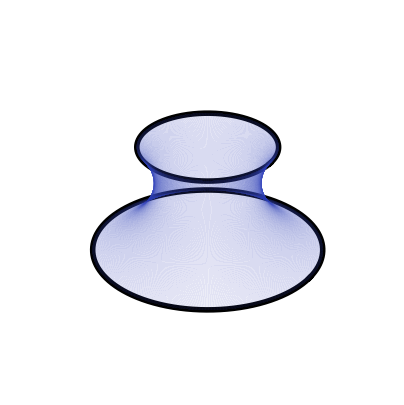

In [64]:
importlib.reload(task2);
# This should display a soap film with a small ring above
# and a larger ring below.
fig, ax = task2.surface(0.6, 1)
plt.show()

---
### Catastrophe!  

As mentioned before, sometimes there are no $k$ solutions for given $b, d$ pairs; and sometimes there are two solutions, but one of those solutions doesn't come with a minimal total area integral.

However, for a given $b$ parameter, there are special values of $d$ where those two solutions coalesce into a single solution. That point is called a *catastrophe* or *tipping point*. For the soap film, it means that there's only so far you can pull the rings apart before they pop! It's not that the solution becomes unstable (or too delicate); the equilibrium *fails to exist*.

You can see this type of general behaviour even in a simple parabola:

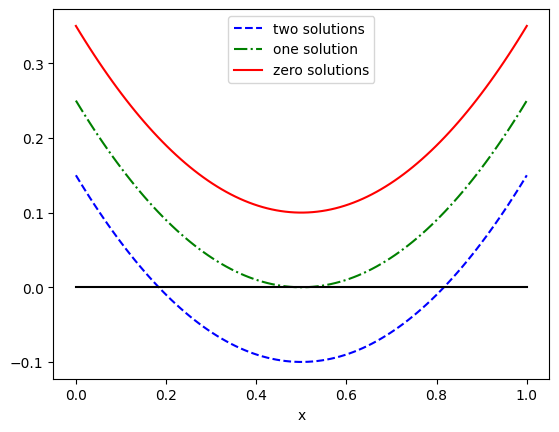

In [65]:
x = np.linspace(0, 1, 100)
y = (x - 0.5)**2
fig, ax = plt.subplots()
ax.plot(x, y - 0.1, 'b--')
ax.plot(x, y, 'g-.')
ax.plot(x, y + 0.1, 'r')
ax.legend(['two solutions', 'one solution', 'zero solutions'])
ax.plot(x, 0*x, 'k')
ax.set(xlabel='x')
plt.show()

The parabola demonstrates that the condition for when the two roots merge is that both the function and its derivative vanish just before both solutions disappear. 

In the soap film case, given $b$, this gives us a system of 2 simultaneous equations,

$$
r_{k}(d) - b \ = \ 0 \qquad (1), \qquad \frac{\partial}{\partial k} \, r_{k}(d) \ = \ 0 \qquad (2),
$$

which we can solve for $d, k$ together. However, it's also possible to use a change of variables,

$$d = z \, k.$$

Then we can use $(1)$ to find,

$$
\sqrt{1-k^{2}}  \ = \ \frac{\cosh(\,z\,)  - b}{\sinh(\,z\,)}.
$$

Finally, we can substitute $k$ back into $(2)$ to find a closed equation purely for $z$ in terms of $b$. After solving for $z$, we can calculate $k$ and then $d$.

---
#### 🚩 2.d [3 marks]

Write a function `critical_d(b, eps)` that takes two input arguments, `b` and a tolerance `eps`, and returns the value for $d$ where the stable soap film disintegrates. For full marks, your function should also be *vectorised*, where it can input a NumPy array of $b$ parameter values, and return an array of the same shape with corresponding values of $d$.

The result should be returned correctly within tolerance `eps`, as was done in question 2.a.

Then, in the code cell below, make a plot of $d$ as a function of $b$ over the interval $[0.2, 5]$.

_Note: the result below for $b=1$ means that you can only pull two equal rings apart $\approx 1.325\times$  their mutual radii before the bubble pops._

In [138]:
importlib.reload(task2);
eps = 1e-6
assert round(task2.critical_d(1, eps), 3) == 1.325
assert round(task2.critical_d(0.5, eps), 3) == 0.913
print('All tests passed.')

All tests passed.


Text(0.5, 1.0, 'Distance Where Stable Soap Film Disintegrates vs. Right Radius Length')

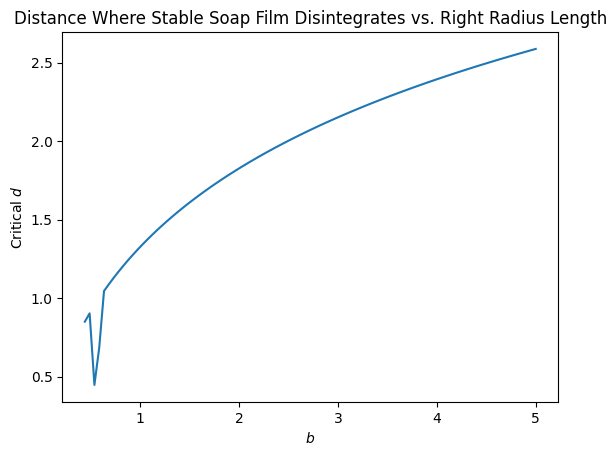

In [142]:
importlib.reload(task2);

b = np.linspace(0.2, 5, 100)
d = task2.critical_d(b, eps)
fig, ax = plt.subplots()
ax.plot(b, d)
ax.set_ylabel(f"Critical $d$")
ax.set_xlabel(f"$b$")
ax.set_title("Distance Where Stable Soap Film Disintegrates vs. Right Radius Length")

---
## Task 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u(t)$ and a recovery variable $v(t)$,

$$
\frac{du}{dt} = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ ,
$$

$$
\frac{dv}{dt} = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
$$

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

---
#### 🚩 3.a [4 marks]

The fixed points $(u^*, v^*)$, defined as the solutions of $\frac{du}{dt} = f(u, v) = 0$ and $\frac{dv}{dt} = g(u, v) = 0$, correspond to the state of a cell at rest.

Write a function `resting_state(u_init, v_init, eps, gamma, beta, I)` which takes five input arguments:

- `u_init` and `v_init`, two floating point numbers representing an initial guess $(u_{\text{init}}, v_{\text{init}})$ for the fixed points,
- `eps`, `gamma`, `beta`, and `I`, four floating point numbers representing the values of parameters $\varepsilon, \gamma, \beta, I$ respectively,

and returns as two floating point numbers, the values $(u^*, v^*)$ for the cell in its resting state for a given set of parameters, determined using Newton's method with the initial guess $(u_{\text{init}}, v_{\text{init}})$. Use a tolerance of at most $10^{-8}$.

In [ ]:
importlib.reload(task3);
u_init, v_init = 0.2, 0.2
eps, gamma, beta = 0.2, 0.8, 0.7
I = 0.
u_star, v_star = task3.resting_state(u_init, v_init, eps, gamma, beta, I)
assert round(u_star, 3) == -1.199
assert round(v_star, 3) == -0.624
print('Tests passed.')

Tests passed.


---
#### 🚩 3.b [7 marks]

Write a function `solve_ODE(u0, v0, nmax, dt, eps, gamma, beta, I)` which computes the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t))$ for $n=0, 1, 2, \dots, n_{\max}$ for the FitzHugh-Nagumo model, with initial condition $(u_0, v_0) = (u(t=0), v(t=0))$.

Your function should use the forward Euler method (seen in Week 7), with step size $\Delta t$, and return the result as a NumPy array with 2 rows and $n_{\max}+1$ columns, where the first row contains the values of $u_n$ and the second row contains the values of $v_n$.

In [ ]:
importlib.reload(task3);
u0, v0 = 0.8, 0.5
eps, gamma, beta, I = 0.2, 0.8, 0.7, 3.
dt = 1e-2
nmax = 10000
uv = task3.solve_ODE(u0, v0, nmax, dt, eps, gamma, beta, I)

# Check initial conditions have been set correctly
np.testing.assert_equal(uv[:, 0], [u0, v0])

# Check final values are reasonable
assert 1.5 < uv[0, -1] < 2.0
assert 2.8 < uv[1, -1] < 3.3

print('Tests passed.')

Tests passed.


---
#### 🚩 3.c [4 marks]

Write a function `plot_solutions(uv, dt)` which takes two input arguments:

- `uv`, a NumPy array with 2 rows and $n_{\max}+1$ columns containing $(u_n, v_n)$ values as returned by `solve_ODE()`,
- `dt`, a floating point number representing $\Delta t$, the step size used to compute `uv`,

and returns `fig` and `ax`, a Figure and Axes object respectively, containing 2 subplots:

- The left subplot should show $u_n$ and $v_n$ with **time** (not time step) on the x-axis.
- The right subplot should show $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

Some starter code is given to you to set up the figure and axes objects.

Then, in the code cell below, use your functions `solve_ODE()` to compute the solution for both $I = 0$ and $I = 0.5$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition, and the following parameter values:

- $n_{\max} = 10^4$
- $\Delta t = 10^{-2}$ seconds
- $\varepsilon = 0.2$
- $\gamma = 0.8$
- $\beta = 0.7$

Then, use your function `plot_solutions()` to display the solutions for both values of $I$. This means that running the cell should display 4 separate plots (2 subplots for each value of $I$). You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.

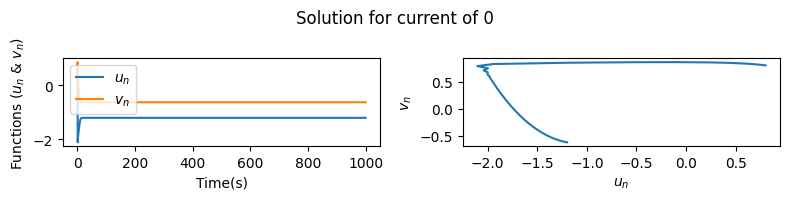

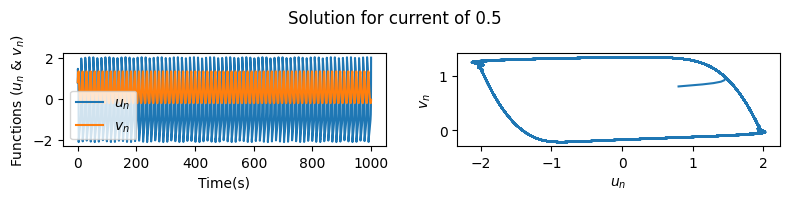

In [ ]:
importlib.reload(task3);

# Set parameters
nmax = 10**4
dt = 10e-2
eps = 0.2
gamma = 0.8
beta = 0.7
I_vals = [0, 0.5]
u0 = 0.8
v0 = 0.8

# Plot for each I value
for I in I_vals:
    uv = task3.solve_ODE(u0, v0, nmax, dt, eps, gamma, beta, I)
    fig, ax = task3.plot_solutions(uv, dt)
    
    # Specific title for each I
    fig.suptitle(f'Solution for current of {I}')
    
    # Fix layout of overlapping titles/graphs
    fig.tight_layout()

plt.show()

The results show that for a current of 0, the plots are relatively stable. This means that there is no oscillations for the functions graphed against time. This is also demonstrated in the plot that shows the solutions in the phase space. The functions stop at a certain point and do loop around infinitely. Essentially, no current means the heart is not beating. The recovery variable is higher than the potential variable. This means it is at rest and is reflected by the equilibrium/stability shown in the graphs. Contrarily, a current i.e. stimulus of 0.5 will disrupt the equilibrium. This leads to the oscillations shown of between potential and recovery. The recovery variable is slightly lower and lags compared to the potential variable. This makes sense because potential has repeated spikes, which cause the cell to recover. But, the recovery is not too as to limit the cell from further movement i.e. why it is lower than potential. In the phase space space, this is demonstrated as a continuous circle of sustained movement. Ultimately, the system captures the excitable system of neruons as they transfer information through spikes i.e. rest to action potental.

---
#### 🚩 3.d [5 marks]

For this question, we set the following parameter values:

- $n_{\max} = 10^4$
- $\Delta t = 10^{-2}$ seconds
- $\varepsilon = 0.2$
- $\gamma = 5$
- $\beta = 0.7$
- $I = 0$

In the code cell below, write code to:

(a) Use the function `resting_state()` you wrote for **3.a** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial guesses provided in the NumPy array `uv_init` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots, n_{\max}$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

(c) Use your function `plot_solutions()` to plot your results for the 4 different values of $\delta$, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

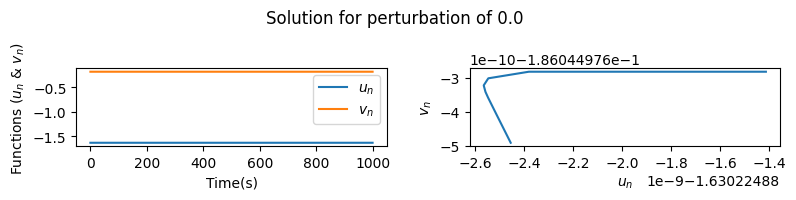

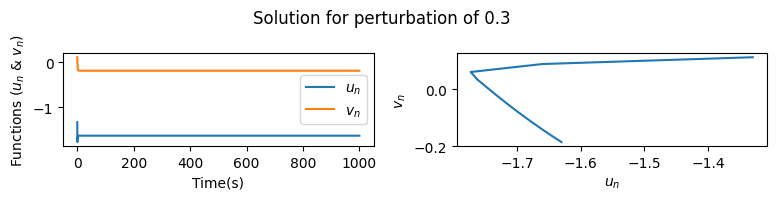

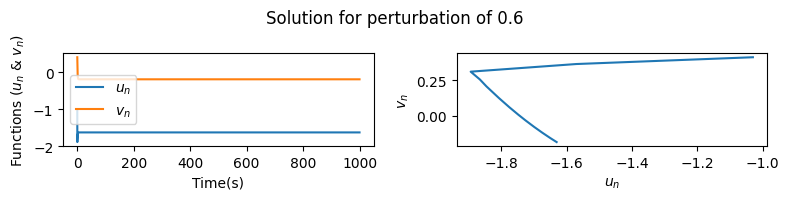

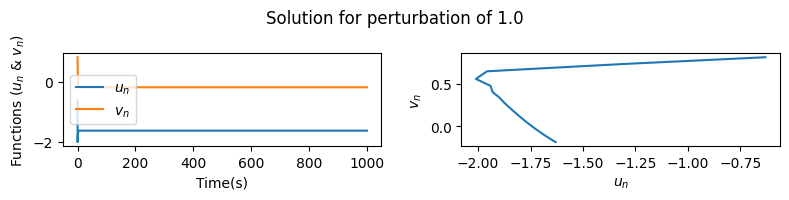

In [ ]:
importlib.reload(task3);

# Inital inputs
nmax = 10000
dt = 10e-2
eps = 0.2
gamma = 5
beta = 0.7
I = 0
s = np.array([0, 0.3, 0.6, 1.0])

# Define starting guesses
uv_init = np.array([[0.9, 0.6], [0., 0.4], [-1.7, -0.3]])

# Store uv values
uv = np.zeros([uv_init.shape[0], uv_init.shape[1]])

# Update each uv value using function
for i in range(uv_init.shape[0]):
    u0, v0 = uv_init[i, 0], uv_init[i, 1]
    uv[i, :] = task3.resting_state(u0, v0, eps, gamma, beta, I)

# Store solution 
activity = np.zeros([uv.shape[1], nmax + 1])

# Loop through set of different sized small perturbations
for j in range(s.shape[0]):

    # Compute numerical solution for the small perturbation
    for i in range(uv.shape[0]):
        u0, v0 = uv[i, 0] + s[j], uv[i, 1] + s[j]
        activity = task3.solve_ODE(u0, v0, nmax, dt, eps, gamma, beta, I)
    
    # Plot each perturbation
    fig, ax = task3.plot_solutions(activity, dt, I)
    
    # Specific title for each I
    fig.suptitle(f'Solution for perturbation of {s[j]}')

    # Fix layout of overlapping titles/graphs
    fig.tight_layout()

All systems reach a system of equilibrium after sometime. There is no oscillations. The equilibrium is reflected by the recovery variable being higher than the transmembrane potential variable, as shown in the left hand side graphs. This is also displayed in the right hand side graphs not looping around and by converging to a single point. As the perturbations increase, the spikes increase along with the distance between recovery and potential. This makes sense because the system is closer to disruption. Ultimately, greater perturbations make the neuron system more likely to fire. This is reflected in the real world and the graphs. This system is generally stable to the levels of small perturbations. This makes sense because neurons in the real world should not always be fired based on small perturbations. 